- 이예영

## Ch. 2 Introductory Examples

### 1. usa.gov data from bit.ly

- 웹에 저장되어 있는 txt 파일을 url로 접근해 가져오기 위한 urllib2 모듈 활용

In [29]:
pathUrl2 = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [30]:
import urllib

In [31]:
response = urllib.urlopen(pathUrl2)

In [32]:
responseLines = response.readlines()

In [33]:
responseLines[0]

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [34]:
import json

In [35]:
records = [json.loads(line) for line in responseLines]


In [36]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [37]:
records[0]['tz']

u'America/New_York'

In [38]:
print records[0]['tz']

America/New_York


1) 순수 파이썬으로 표준시간대 세어보기 (Time zone 카운팅)

In [39]:
time_zones=[rec['tz'] for rec in records]

KeyError: 'tz'

In [40]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [41]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

- 파이썬 표준 라이브러리 collections.Counter 클래스 이용

In [171]:
from collections import defaultdict

In [42]:
from collections import Counter

In [172]:
def get_counts2(sequence):     #카운트 하는 함수 정의
    counts = defaultdict(int)  #values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [43]:
counts = Counter(time_zones)

In [44]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]


2) pandas로 표준시간대 세어보기

In [45]:
from pandas import DataFrame, Series

In [ ]:
# pandas 모듈에서 DataFrame 클래스를 가져온다.
# 패키지 = 모듈을 여러개 묶어놓은거
# series = data의 열거

In [173]:
type(pandas)

NameError: name 'pandas' is not defined

In [46]:
import pandas as pd; 
import numpy as np

In [47]:
pd.__version__

'0.16.1'

In [174]:
type(records[0])

dict

In [48]:
frame = DataFrame(records)

In [49]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [177]:
frame['tz'][:10]

KeyError: 'tz'

In [51]:
tz_counts = frame['tz'].value_counts()


In [52]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

- plot 결과가 ipython notebook 페이지에 안보일때 아래명령어 수행

In [53]:
%matplotlib inline

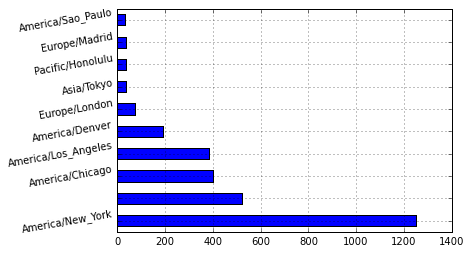

In [54]:
tz_counts[:10].plot(kind='barh', rot=10)

- url 축약하는데 다음과같은 정보가 담은 필드 존재

In [55]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [56]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [57]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [58]:
result = Series([x.split()[0] for x in frame.a.dropna()])

In [59]:
result[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [60]:
result.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [61]:
cframe = frame[frame.a.notnull()]

In [62]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [63]:
operating_system[:5]  
#각 행이 윈도우인지 아닌지 검사

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [64]:
by_tz_os = cframe.groupby(['tz', operating_system])
#표준시간대와 운영체제 데이터를 그룹으로 묶기

- 그룹별 합계는 size함수로 계산한다

In [65]:
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

In [66]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [67]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [68]:
indexer = agg_counts.sum(1).argsort()

In [69]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [70]:
count_subset = agg_counts.take(indexer)[-10:]
#take를 사용해 정렬된 순서그대로 선택, 마지막 10행 잘라내기

In [71]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


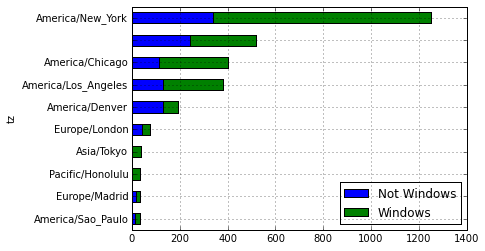

In [72]:
count_subset.plot(kind='barh', stacked=True)

In [73]:
nored_subset = count_subset.div(count_subset.sum(1), axis=0)

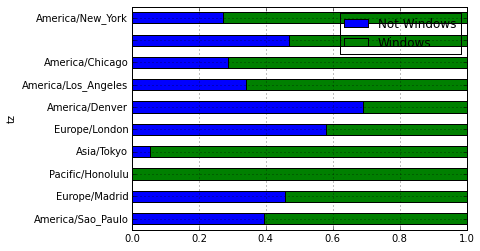

In [74]:
nored_subset.plot(kind='barh', stacked=True)

## 2. MovieLens의 영화평점 데이터

- 웹의 url을 사용하여 파일읽기

In [75]:
pathUrl3 = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/users.dat'

In [76]:
import urllib

In [77]:
response = urllib.urlopen(pathUrl3)

In [78]:
responseLines = response.readlines()
#한줄씩읽음

In [79]:
responseLines

['1::F::1::10::48067\n',
 '2::M::56::16::70072\n',
 '3::M::25::15::55117\n',
 '4::M::45::7::02460\n',
 '5::M::25::20::55455\n',
 '6::F::50::9::55117\n',
 '7::M::35::1::06810\n',
 '8::M::25::12::11413\n',
 '9::M::25::17::61614\n',
 '10::F::35::1::95370\n',
 '11::F::25::1::04093\n',
 '12::M::25::12::32793\n',
 '13::M::45::1::93304\n',
 '14::M::35::0::60126\n',
 '15::M::25::7::22903\n',
 '16::F::35::0::20670\n',
 '17::M::50::1::95350\n',
 '18::F::18::3::95825\n',
 '19::M::1::10::48073\n',
 '20::M::25::14::55113\n',
 '21::M::18::16::99353\n',
 '22::M::18::15::53706\n',
 '23::M::35::0::90049\n',
 '24::F::25::7::10023\n',
 '25::M::18::4::01609\n',
 '26::M::25::7::23112\n',
 '27::M::25::11::19130\n',
 '28::F::25::1::14607\n',
 '29::M::35::7::33407\n',
 '30::F::35::7::19143\n',
 '31::M::56::7::06840\n',
 '32::F::25::0::19355\n',
 '33::M::45::3::55421\n',
 '34::F::18::0::02135\n',
 '35::M::45::1::02482\n',
 '36::M::25::3::94123\n',
 '37::F::25::9::66212\n',
 '38::F::18::4::02215\n',
 '39::M::18

1) pandas.read_table 이용해 DataFrame 불러오기

In [80]:
import pandas as pd

In [81]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']

- github에서 rqw의 url을 복사하여 다음과 같이 사용

In [82]:
users = pd.read_table('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/users.dat', 
                      sep='::', header=None, names=unames)

C:\Users\S525\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\io\parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [83]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

In [84]:
ratings = pd.read_table('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/ratings.dat', 
                        sep='::', header=None, names=rnames)

In [85]:
mnames = ['movie_id', 'title', 'genres']

In [86]:
movies = pd.read_table('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/movielens/movies.dat', 
                       sep='::', header=None, names=mnames)

In [87]:
users[:]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [88]:
ratings[:]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [89]:
movies[:]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [90]:
type(movies)

pandas.core.frame.DataFrame

2) .pandas의 merge()로 병합하기

In [91]:
data = pd.merge(pd.merge(ratings, users), movies)

In [92]:
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [93]:
data.ix[0]
#0번째 행의 정보

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

3) 성별에 따른 영화의 평균 평점 구하기 (pivot_table 사용)

In [94]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
#책의 rows, cols가 index, colums로 바뀜
#aggfunc은 default값이 mean 이며, 값을 어떻게 나타낼지 결정하는 함수

In [95]:
mean_ratings[:5]
#성별에 따른 영화 평점 DataFrame으로 객체 생성

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


4) 250건 이상의 평점 정보가 있는 영화만 추리기 (size() 사용)

In [96]:
ratings_by_title = data.groupby('title').size()

In [97]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

- 250건 이상의 평점 정보가 있는 영화의 색인은 mean_ratings에서 항목을 선택하기 위해 사용

In [98]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [99]:
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)', 
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

- 250건 이상의 영화에 대한 색인은 mean_ratings에서 항목을 선택하기위해 사용

In [100]:
mean_ratings = mean_ratings.ix[active_titles]

In [101]:
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


- 여성에게 높은 평점을 받은 영화목록 확인

In [102]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending = False)

In [103]:
top_female_ratings[:]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


5) 평점 차이 구하기

In [104]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
#남성 평점과 여성평점 차이를 diff에 넣기

In [105]:
sorted_by_diff = mean_ratings.sort_index(by='diff')

In [106]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [107]:
sorted_by_diff[::-1][:10]
#역순으로 상위 10개만 (남성들이 선호하는 순으로)

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


- 호불호가 극명핳게 나뉘는 영화 찾기

In [108]:
#평점의 표준편차
rating_std_by_title = data.groupby('title')['rating'].std()

In [109]:
#active_titles만 선택
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [110]:
#내림차순으로 정렬
rating_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [111]:
rating_std_by_title.order(ascending=True)[:10]

title
Close Shave, A (1995)                            0.667143
Rear Window (1954)                               0.688946
Great Escape, The (1963)                         0.692585
Shawshank Redemption, The (1994)                 0.700443
Wrong Trousers, The (1993)                       0.708666
Raiders of the Lost Ark (1981)                   0.725647
North by Northwest (1959)                        0.732515
Hustler, The (1961)                              0.737298
Double Indemnity (1944)                          0.740793
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    0.740924
Name: rating, dtype: float64

## 3.신생아 이름

In [112]:
import pandas as pd

In [113]:
names1880 = pd.read_csv('https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/names/yob1880.txt', 
                         names=['name', 'sex', 'births'])

In [114]:
names1880[:]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [115]:
names1880.groupby('sex').births.sum()
#성별에 따라 그룹화하여 birth값을 구함 (해당연도의 전체 출생수)

sex
F     90993
M    110493
Name: births, dtype: int64

1) 연도별로 나누어진 데이터를 DataFrame으로 취함 (panda.concat 사용)

In [116]:
years = range(1880, 2011)  #2010년 데이터가 가장 마지막

In [117]:
pieces=[]

In [118]:
columns = ['name', 'sex', 'births']

In [119]:
for year in years:
    path = 'https://raw.githubusercontent.com/pydata/pydata-book/master/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [120]:
#하나의 DataFrame으로 모든 데이터를 연결시키면
names = pd.concat(pieces, ignore_index=True)
#read_csv를 통해 읽어온 원래 행 순서는 몰라도 되므로 index무시

In [121]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


- 이것을 토대로 groupby and pivot_table을 이용해서 연도나 성별 데이터 수집 가능

In [122]:
total_births = names.pivot_table('births', index='year', 
                                 columns='sex', aggfunc=sum)

In [123]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


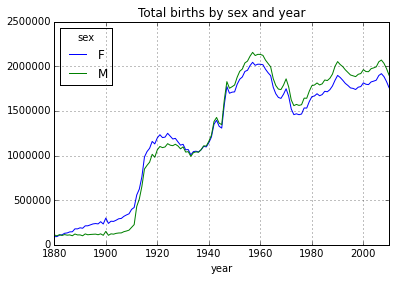

In [124]:
total_births.plot(title='Total births by sex and year')

2) prop열을 추가해서 전체 출생수에서 차지하는 비율 계산

In [125]:
#함수 정의
def add_prop(group):
    #Integer division floors
    births = group.births.astype(float)   #birth를 float타입으로
    
    group['prop'] = births/ births.sum()  
    #births를 births전체의 합으로 나누면 prop라는 출생률 계산
    return group

In [126]:
names = names.groupby(['year', 'sex']).apply(add_prop)  
#새로운 열을 추가

In [127]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


3) 모든 그룹에서 prop의 열의 합이 1이 맞는지 확인 (sanity check - np.allclose() 사용)

In [128]:
import numpy as np

In [129]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

4) 연도별, 성별에 따른 빈도수가 가장 높은 이름 100개 추출 (그룹연산 사용)

In [130]:
#함수정의
def get_top100(group):
    return group.sort_index(by='births', ascending=False)[:100]
    #birth로 내림차순 정렬
    
grouped = names.groupby(['year', 'sex']) #year,sex로 그룹화해서 top100 출력

In [131]:
top100 = grouped.apply(get_top100)

In [132]:
top100

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1676714     Xavier   M    5701  2010  0.003003
         1676715        Ian   M    5510  2010  0.002902
         1676716     Colton   M    5270  2010  0.002776
         1676717    Dominic   M    5260  2010  0.002771
         1676718       Juan   M    5217  2010  0.002748
         1676719     Cooper   M    5206  2010  0.002742
         1676720     Josiah   M    5138  2010  0.002707
         1676721       Luis   M    5104  2010  0.002689
         1676722      Ayden   M    5096  2010  0.002684
         1676723     Carson   M    5064  2010  0.002668
         1676724       Adam   M    5062  2010  0.002666
         1676725  Nathaniel   M    5039  2010  0.002654
         1676726      Brody   M    5015  2010  0.002642
         1676727    Tristan   M    4854  2010  0.002557
         1676728      Diego   M    4693  2010  0.002472
         1676729     Parker   M    4687  2010  0.002469
         1676730      Blake   M    4666  2010  0.002458
         1676731     Oliver   M    4632  2010  0.002440
         1676732       Cole   M    4562  2010  0.002403
         1676733     Carlos   M    4559  2010  0.002402
         1676734      Jaden   M    4468  2010  0.002354
         1676735      Jesus   M    4425  2010  0.002331
         1676736       Alex   M    4409  2010  0.002323
         1676737      Aidan   M    4263  2010  0.002246
         1676738       Eric   M    4163  2010  0.002193
         1676739     Hayden   M    4151  2010  0.002187
         1676740      Bryan   M    3914  2010  0.002062
         1676741        Max   M    3819  2010  0.002012
         1676742      Jaxon   M    3802  2010  0.002003
         1676743      Brian   M    3744  2010  0.001972

[26200 rows x 5 columns]

## 4.이름유행 분석

1) 1000개의 데이터를 남자와 여자로 분리

In [133]:
boys = top100[top100.sex == 'M']

In [134]:
girls = top100[top100.sex == 'F']

- 연도와 이름에 대한 전체 출생수를 피벗테이블로 작성

In [135]:
total_births = top100.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [136]:
total_births[:10]

name,Aaliyah,Aaron,Abigail,Ada,Adam,Addie,Addison,Adrian,Agnes,Aidan,...,Willis,Wilma,Woodrow,Wyatt,Xavier,Yolanda,Yvonne,Zachary,Zoe,Zoey
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,652,NaN,274,NaN,NaN,473,NaN,...,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,628,NaN,287,NaN,NaN,424,NaN,...,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,689,NaN,341,NaN,NaN,565,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,778,NaN,362,NaN,NaN,623,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,854,NaN,356,NaN,NaN,703,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,876,NaN,406,NaN,NaN,695,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1886,NaN,NaN,NaN,915,NaN,417,NaN,NaN,779,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887,NaN,NaN,NaN,910,NaN,393,NaN,NaN,896,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,NaN,1116,NaN,455,NaN,NaN,1046,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A7D6A58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000169B6208>], dtype=object)

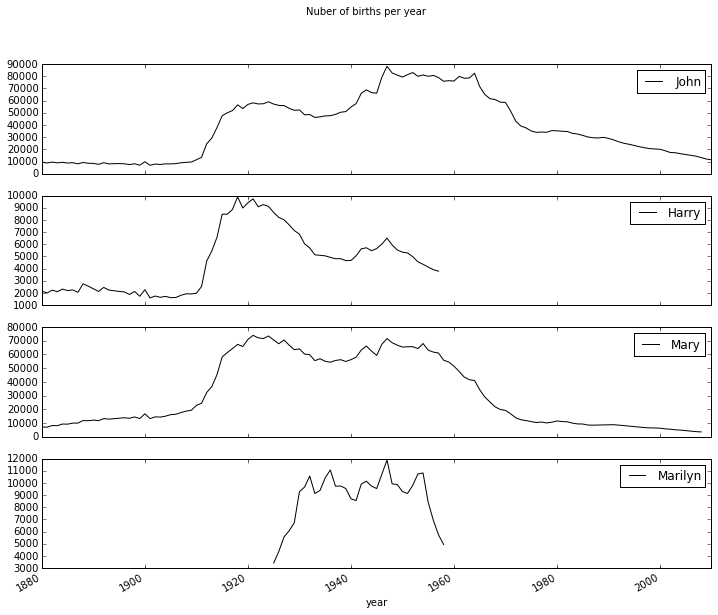

In [138]:
%matplotlib inline
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Nuber of births per year')

2) 다양한 이름을 사용하는 경향 파악하기

위의 표를 통해서 부모가 아이 이름을 지을 때 흔한 이름은 기피하는것으로 해석할 수 있다.

In [139]:
table = top100.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

In [140]:
table[:10]

sex,F,M
year,,
1880,0.765454,0.801381
1881,0.765766,0.802537
1882,0.760688,0.796098
1883,0.755177,0.799650
1884,0.747281,0.792232
1885,0.741334,0.789633
1886,0.736166,0.788870
1887,0.731332,0.790252
1888,0.725104,0.783794


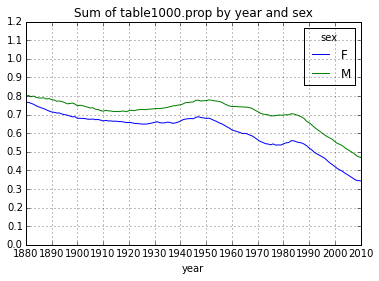

In [141]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

- 위 그래프를 통해 실제로 이름의 다양성이 높아지고 있음을 보인다. (비율의 총합이 시간이 흐를수록 감소하고 있음을 보인다.)

In [142]:
df = boys[boys.year == 2010] #2010년에 인기있는 이름순으로 정렬

In [143]:
df

name sex  births  year      prop
year sex                                                 
2010 M   1676644        Jacob   M   21875  2010  0.011523
         1676645        Ethan   M   17866  2010  0.009411
         1676646      Michael   M   17133  2010  0.009025
         1676647       Jayden   M   17030  2010  0.008971
         1676648      William   M   16870  2010  0.008887
         1676649    Alexander   M   16634  2010  0.008762
         1676650         Noah   M   16281  2010  0.008576
         1676651       Daniel   M   15679  2010  0.008259
         1676652        Aiden   M   15403  2010  0.008114
         1676653      Anthony   M   15364  2010  0.008093
         1676654       Joshua   M   15238  2010  0.008027
         1676655        Mason   M   14728  2010  0.007758
         1676656  Christopher   M   14135  2010  0.007446
         1676657       Andrew   M   14093  2010  0.007424
         1676658        David   M   14042  2010  0.007397
         1676659      Matthew   M   13954  2010  0.007350
         1676660        Logan   M   13943  2010  0.007345
         1676661       Elijah   M   13735  2010  0.007235
         1676662        James   M   13714  2010  0.007224
         1676663       Joseph   M   13657  2010  0.007194
         1676664      Gabriel   M   12722  2010  0.006701
         1676665     Benjamin   M   12280  2010  0.006469
         1676666         Ryan   M   11886  2010  0.006261
         1676667       Samuel   M   11776  2010  0.006203
         1676668      Jackson   M   11693  2010  0.006159
         1676669         John   M   11424  2010  0.006018
         1676670       Nathan   M   11269  2010  0.005936
         1676671     Jonathan   M   11028  2010  0.005809
         1676672    Christian   M   10965  2010  0.005776
         1676673         Liam   M   10852  2010  0.005716
...                       ...  ..     ...   ...       ...
         1676714       Xavier   M    5701  2010  0.003003
         1676715          Ian   M    5510  2010  0.002902
         1676716       Colton   M    5270  2010  0.002776
         1676717      Dominic   M    5260  2010  0.002771
         1676718         Juan   M    5217  2010  0.002748
         1676719       Cooper   M    5206  2010  0.002742
         1676720       Josiah   M    5138  2010  0.002707
         1676721         Luis   M    5104  2010  0.002689
         1676722        Ayden   M    5096  2010  0.002684
         1676723       Carson   M    5064  2010  0.002668
         1676724         Adam   M    5062  2010  0.002666
         1676725    Nathaniel   M    5039  2010  0.002654
         1676726        Brody   M    5015  2010  0.002642
         1676727      Tristan   M    4854  2010  0.002557
         1676728        Diego   M    4693  2010  0.002472
         1676729       Parker   M    4687  2010  0.002469
         1676730        Blake   M    4666  2010  0.002458
         1676731       Oliver   M    4632  2010  0.002440
         1676732         Cole   M    4562  2010  0.002403
         1676733       Carlos   M    4559  2010  0.002402
         1676734        Jaden   M    4468  2010  0.002354
         1676735        Jesus   M    4425  2010  0.002331
         1676736         Alex   M    4409  2010  0.002323
         1676737        Aidan   M    4263  2010  0.002246
         1676738         Eric   M    4163  2010  0.002193
         1676739       Hayden   M    4151  2010  0.002187
         1676740        Bryan   M    3914  2010  0.002062
         1676741          Max   M    3819  2010  0.002012
         1676742        Jaxon   M    3802  2010  0.002003
         1676743        Brian   M    3744  2010  0.001972

[100 rows x 5 columns]

3) 전체의 50%가 되기까지 얼마나 많은 이름이 등장하나 (Numpy 이용)

In [144]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
#prop의 누계가 0.5가 되는 위치를 구한다.

In [145]:
prop_cumsum

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
           1676654    0.097648
           1676655    0.105406
           1676656    0.112852
           1676657    0.120276
           1676658    0.127672
           1676659    0.135023
           1676660    0.142368
           1676661    0.149603
           1676662    0.156827
           1676663    0.164021
           1676664    0.170722
           1676665    0.177191
           1676666    0.183452
           1676667    0.189655
           1676668    0.195815
           1676669    0.201832
           1676670    0.207769
           1676671    0.213578
           1676672    0.219354
           1676673    0.225070
                        ...   
           1676714  

In [146]:
type(prop_cumsum)

pandas.core.series.Series

In [147]:
prop_cumsum.searchsorted(0.03)

array([3], dtype=int64)

In [148]:
prop_cumsum.searchsorted(0.03)[0]

3

In [149]:
prop_cumsum.searchsorted(0.5)[0] + 1  
#색인의 경우 시작을 0부터 하기 때문에 +1을 한다.

101

In [150]:
df = boys[boys.year == 1900]

In [151]:
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5)[0] + 1

25

- 각 연도와 성별 조합에 적용할 수 있다. 
연도와 성별을 Groupby로 묶고 각 그룹에 apply를 사용하여 연산을 적용한다.

In [152]:
#함수 선언
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1

diversity = top100.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

- 연산 결과인 diversity DataFrame은 이제 각 성별에 따라 연도별로 색인된 2개의 시계열 데이터를 담고 있다.

In [153]:
diversity.head()  #diversity[:5]와 같은 결과

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


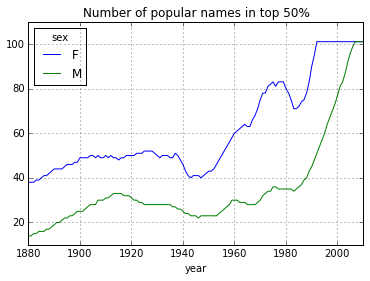

In [154]:
diversity.plot(title = "Number of popular names in top 50%")
#numeric searchsorted 는 배열의 위치를 찾는 것이기 때문에 int형이 아님

## 5. '마지막 글자'의 변환

1) 연도와 성별, 이름의 마지막 글자를 수집해서 확인

In [155]:
#name 열에서 마지막 글자를 추출
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [156]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()  #subtable[:5]와 같은 효과

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b               NaN     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012

2) 전체 출생수에서 성별로 각각의 마지막 글자가 차지하는 비율 계산


In [157]:
subtable.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: float64

In [158]:
letter_prop = subtable / subtable.sum().astype(float)

(<matplotlib.axes._subplots.AxesSubplot at 0x1722a5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c528080>)

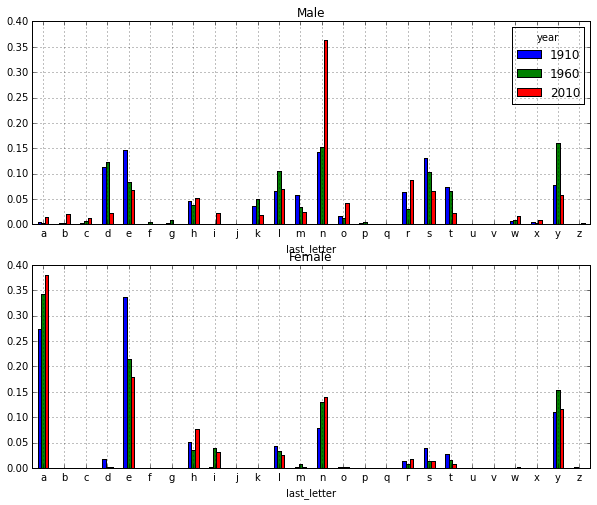

In [159]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male'), letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

그래프에서 보듯이 남자는 'n'으로 끝나는 이름이 1960이후 증가

3) 성별로 정규화, 남자아이 이름에서 몇 글자를 선택하여 이름을 열로 하는 시계열 데이터로 변환

In [160]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


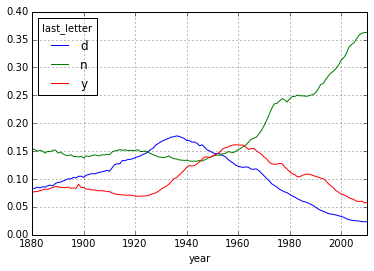

In [161]:
dny_ts.plot()

## 6. 남자 이름과 여자 이름이 바뀐 경우

1) lesley 또는 Leslie 라는 이름이 그러한 경우, top1000을 이용하여 'lesl'로 시작하는 이름이 포함된 리스트 생성

In [162]:
all_names = top100.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])

In [163]:

lesley_like = all_names[mask]
lesley_like

array(['Leslie'], dtype=object)

2)이름들만 추려내어 이름별로 출생수를 구하고 상대 도수 확인

In [164]:
filtered = top100[top100.name.isin(lesley_like)]

In [165]:
filtered.groupby('name').births.sum()

name
Leslie    191481
Name: births, dtype: int64

In [166]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [167]:
table = table.div(table.sum(1), axis=0)

In [168]:
table.tail()

sex,F,M
year,,
2000,1,NaN
2001,1,NaN
2002,1,NaN
2003,1,NaN
2004,1,NaN


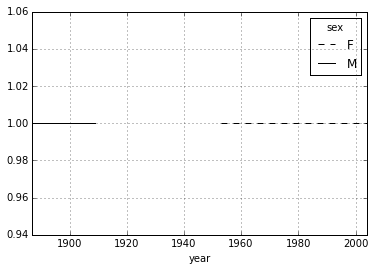

In [169]:
table.plot(style={'M': 'k-', 'F': 'k--'})  
#남자는 실선으로, 여자는 점선으로 표시